In [1]:
#import analysis_util as au
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys, os
from glob import glob
import pickle5 as pickle

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

sys.path.append("/localdata2/jent_so/LM_GenderBias")

In [2]:
def posneg(list):
    pos = [x for x in list if x>0]
    neg = [x for x in list if x<0]
    
#    print(len(pos), len(neg)) 
    return np.mean(pos), np.mean(neg), len(pos), len(neg)
    

def rename(name):
    specs = [
        ['N_pro', 'remove Pronouns'], 
        ['N_weat', 'remove WEAT'], 
        ['N_all', 'remove All'],
        ['mix_pro', 'mix Pronouns'], 
        ['mix_weat', 'mix WEAT'], 
        ['mix_all', 'mix All'], 
        ['original_Rall', 'All'], 
        ['original_Rweat', 'WEAT'], 
        ['original_Rpro', 'Pronouns'], 
    ]
        #['original']
    for spec in specs:
        if spec[0] in name:
            return spec[1]
    print("error")


In [3]:
def calc_bias_dict(df_dict):
    bias_dict = {}

    for spec in df_dict.keys():
        bias_l = df_dict[spec].bias.tolist()
        # total bias
        overall_bias_total = np.mean(bias_l)
        overall_bias_total_noZero = np.mean([i for i in bias_l if i != 0])
        # absolute bias
        overall_bias_abs = np.mean([abs(x) for x in bias_l])
        overall_bias_abs_noZero = np.mean([abs(x) for x in bias_l if x != 0])
        # pos neg bias 
        pos, neg, pos_n, neg_n = posneg(bias_l) 

        bias_dict[spec] = [
            overall_bias_total, # 0
            overall_bias_abs, # 1
            pos, neg, # 2 3 
            pos_n, neg_n, # 4 5 
            overall_bias_total_noZero, # 6
            overall_bias_abs_noZero  ] # 7 
    return bias_dict

# 
---  
---  
---  
#    
---  
---  
---  
# 
---  
---  
---  
# 

12098 6204
15527 5233
13061 3234
9001 6838
7794 7505
10874 5430
16431 4319
12128 6187
7135 6421


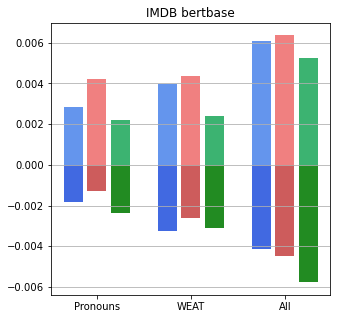

In [6]:
def twoSidedBias(task, model_id, 
                 # specs= ['N_pro', 'N_weat', 'N_all', 'mix_pro', 'mix_weat', 'mix_all', 'original'], 
                 safe_name=None, y_lim= None):
    
    files = glob("../res_results/ratings/*")
    files.remove('../res_results/ratings/rating_{}_{}_original'.format(task, model_id))
    
    df_dict = {}
    for file in files: 
        if '_{}_'.format(model_id) in file and task in file:
            with open (file, "rb") as fh:
                data = pickle.load(fh)
          #  print(file)
          #  print(rename(file))
            df_dict[rename(file)] = data
    
    plt.rcParams["figure.figsize"] = (5,5)
    
    bias_dict = calc_bias_dict(df_dict) 
    specs = list(df_dict.keys())
    
    specs.sort()
  #  print(specs)
    
    myorder = [1,7,4,  2,8,5,  0,6,3 ]

    poss = [bias_dict[spec][2] for spec in specs] 
    negs = [bias_dict[spec][3] for spec in specs] 
    mids = [bias_dict[spec][7] for spec in specs] 
    
    poss = [poss[i] for i in myorder]
    negs = [negs[i] for i in myorder]
    specs = [specs[i] for i in myorder]
    mids = [mids[i] for i in myorder] 

  #  print(poss)
    c0 = 'tab:blue'
    c1 = 'tab:orange'

    x_pos = np.arange(len(poss)) + [0,0,0,1,1,1,2,2,2]
    
    if y_lim:
        plt.ylim(y_lim)
    
    # Create bars
    #plt.bar(x_pos, biases_abs)
    plt.bar(x_pos, poss, color=["cornflowerblue", "lightcoral", "mediumseagreen" ]*3)
    plt.bar(x_pos, negs, color=["royalblue","indianred",  'forestgreen']*3)
    plt.title('{} {}'.format(task, model_id))
    
    # Create names on the x-axis
    plt.xticks([x_pos[i] for i in [1,4,7]], ['Pronouns', "WEAT", "All"])
   # plt.xticks(rotation=90)
    
    # Show graphic
    plt.grid(axis='y')
    if safe_name:
        #plt.savefig("res_plots/{}_{}".format(safe_name, time() ) )
        plt.savefig("../res_plots/{}".format(safe_name))
    plt.show()

twoSidedBias('IMDB', 'bertbase',  safe_name='foo')


12098 6204
15527 5233
13061 3234
9001 6838
7794 7505
10874 5430
16431 4319
12128 6187
7135 6421


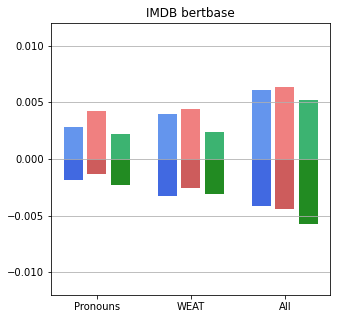

8195 4581
11633 9128
8142 10172
6020 10287
13610 2697
13443 7314
10455 8848
7986 10329
5228 4961


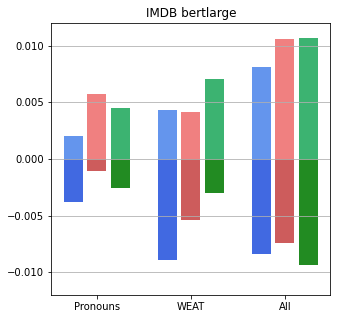

10216 6085
7309 6922
12941 7817
10177 10080
10214 8098
9183 7116
7532 10773
8428 8332
10734 10022


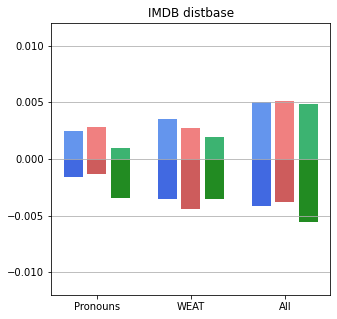

10840 5448
13585 7165
8894 9396
11832 6470
11464 9294
7612 8682
10581 7722
9472 6822
10206 10520


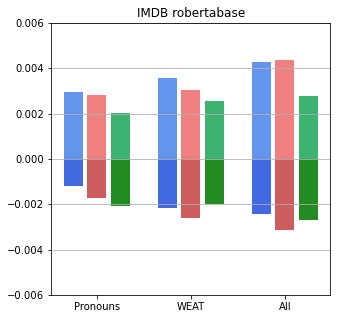

10220 8071
11055 5235
12411 5894
11072 5216
9606 6679
12193 6109
13653 7105
13783 6971
13712 7045


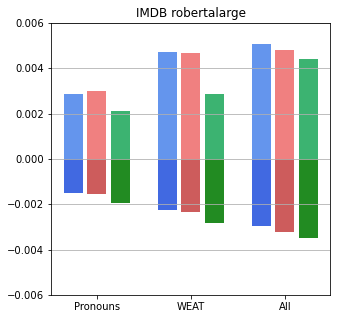

8263 9426
11769 8979
8968 7244
11030 9481
10600 7710
11645 9112
6986 9305
10811 5481
7942 10346


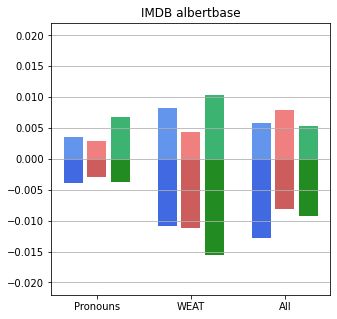

11875 8777
9869 6407
8998 9186
15594 5095
14191 4058
8373 9936
8180 12573
14075 2120
6136 10121


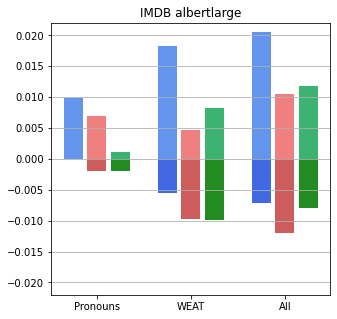

In [7]:
twoSidedBias('IMDB', 'bertbase',  safe_name='twoSidedBias_NEW_IMDB_bertbase_norm', y_lim=[-0.012,0.012])
twoSidedBias('IMDB', 'bertlarge',  safe_name='twoSidedBias_NEW_IMDB_bertlarge_norm', y_lim=[-0.012,0.012])
twoSidedBias('IMDB', 'distbase',  safe_name='twoSidedBias_NEW_IMDB_distbase_norm', y_lim=[-0.012,0.012])

twoSidedBias('IMDB', 'robertabase',  safe_name='twoSidedBias_NEW_IMDB_robertabase_norm', y_lim=[-0.006,0.006])
twoSidedBias('IMDB', 'robertalarge',  safe_name='twoSidedBias_NEW_IMDB_robertalarge_norm', y_lim=[-0.006,0.006])

twoSidedBias('IMDB', 'albertbase',  safe_name='twoSidedBias_NEW_IMDB_albertbase_norm', y_lim=[-0.022,0.022])
twoSidedBias('IMDB', 'albertlarge',  safe_name='twoSidedBias_NEW_IMDB_albertlarge_norm', y_lim=[-0.022,0.022])


12098 6204
15527 5233
13061 3234
9001 6838
7794 7505
10874 5430
16431 4319
12128 6187
7135 6421


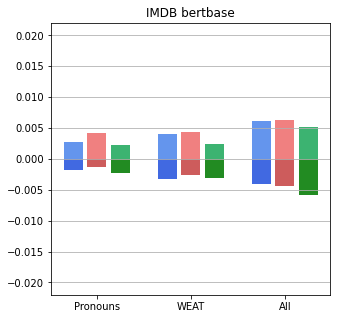

8195 4581
11633 9128
8142 10172
6020 10287
13610 2697
13443 7314
10455 8848
7986 10329
5228 4961


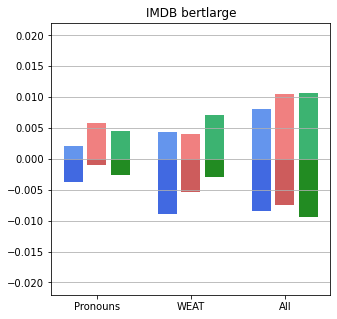

10216 6085
7309 6922
12941 7817
10177 10080
10214 8098
9183 7116
7532 10773
8428 8332
10734 10022


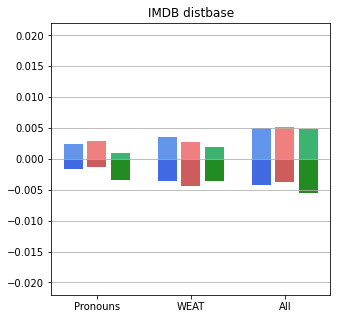

10840 5448
13585 7165
8894 9396
11832 6470
11464 9294
7612 8682
10581 7722
9472 6822
10206 10520


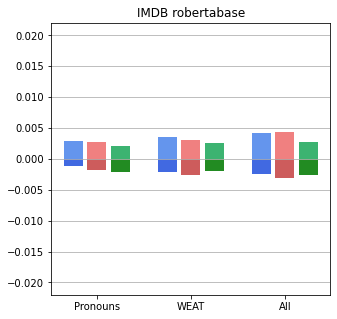

10220 8071
11055 5235
12411 5894
11072 5216
9606 6679
12193 6109
13653 7105
13783 6971
13712 7045


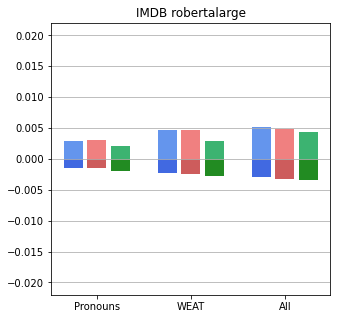

8263 9426
11769 8979
8968 7244
11030 9481
10600 7710
11645 9112
6986 9305
10811 5481
7942 10346


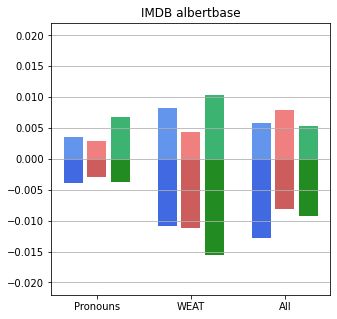

11875 8777
9869 6407
8998 9186
15594 5095
14191 4058
8373 9936
8180 12573
14075 2120
6136 10121


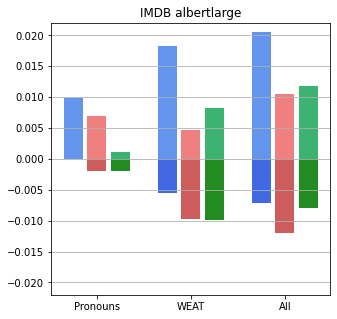

In [8]:
twoSidedBias('IMDB', 'bertbase',  safe_name='twoSidedBias_NEW_IMDB_bertbase_norm_all', y_lim=[-0.022,0.022])
twoSidedBias('IMDB', 'bertlarge',  safe_name='twoSidedBias_NEW_IMDB_bertlarge_norm_all', y_lim=[-0.022,0.022])
twoSidedBias('IMDB', 'distbase',  safe_name='twoSidedBias_NEW_IMDB_distbase_norm_all', y_lim=[-0.022,0.022])
twoSidedBias('IMDB', 'robertabase',  safe_name='twoSidedBias_NEW_IMDB_robertabase_norm_all', y_lim=[-0.022,0.022])
twoSidedBias('IMDB', 'robertalarge',  safe_name='twoSidedBias_NEW_IMDB_robertalarge_norm_all', y_lim=[-0.022,0.022])
twoSidedBias('IMDB', 'albertbase',  safe_name='twoSidedBias_NEW_IMDB_albertbase_norm_all', y_lim=[-0.022,0.022])
twoSidedBias('IMDB', 'albertlarge',  safe_name='twoSidedBias_NEW_IMDB_albertlarge_norm_all', y_lim=[-0.022,0.022])

In [5]:
def getVals(task, model_id):
    
    files = glob("../res_results/ratings/*")
    files.remove('../res_results/ratings/rating_{}_{}_original'.format(task, model_id))
    
    df_dict = {}
    for file in files: 
        if '_{}_'.format(model_id) in file and task in file:
            with open (file, "rb") as fh:
                data = pickle.load(fh)
          #  print(file)
          #  print(rename(file))
            df_dict[rename(file)] = data
    
    plt.rcParams["figure.figsize"] = (5,5)
    
    bias_dict = calc_bias_dict(df_dict) 
    # specs = list(df_dict.keys())
    # myorder = [1,7,4,  2,8,5,  0,6,3 ]
    # specs = [specs[i] for i in myorder]
    
    specs = [
        'Pronouns', 'remove Pronouns', 'mix Pronouns', 
        'WEAT', 'remove WEAT', 'mix WEAT', 
        'All', 'remove All', 'mix All']
        
    poss = [bias_dict[spec][2] for spec in specs] 
    negs = [bias_dict[spec][3] for spec in specs] 
    mids = [bias_dict[spec][7] for spec in specs] 
    
    return poss, negs, specs, model_id, mids
    


In [6]:
getVals('IMDB', 'bertbase')

([0.0028166986008565094,
  0.004193034494875716,
  0.002194202606482512,
  0.003983316048010655,
  0.00437020752711382,
  0.002375292137830253,
  0.006083981608483409,
  0.0063586250300116795,
  0.005237615571632563],
 [-0.0018421046068685207,
  -0.0012913673616707874,
  -0.002345941492051835,
  -0.0032383118550662247,
  -0.002589835044645301,
  -0.003110566818005423,
  -0.004123895245987033,
  -0.004460307167778078,
  -0.0057765710538484555],
 ['Pronouns',
  'remove Pronouns',
  'mix Pronouns',
  'WEAT',
  'remove WEAT',
  'mix WEAT',
  'All',
  'remove All',
  'mix All'],
 'bertbase',
 [0.00249211289260364,
  0.003617152843523477,
  0.002268638866120251,
  0.0037316457809209915,
  0.0037666980264453305,
  0.0027235658705983827,
  0.005589900108726977,
  0.00596350045907255,
  0.0054702929873401375])

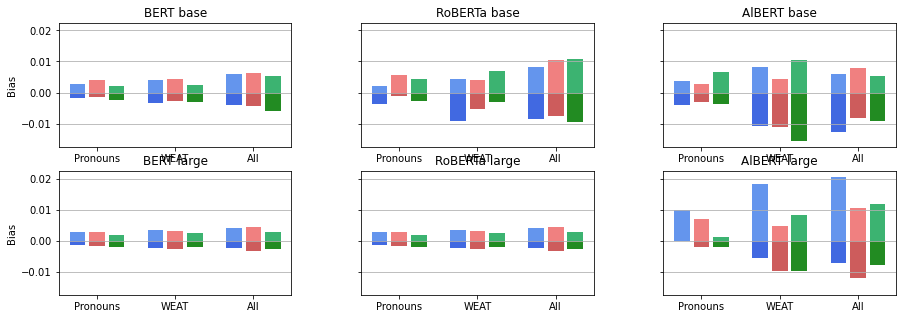

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

#bertb = getVals('IMDB', 'bertbase')
#bertl = getVals('IMDB', 'bertlarge')
#robb = getVals('IMDB', 'robertabase')
#robb = getVals('IMDB', 'robertabase')
#albb = getVals('IMDB', 'albertbase')
#albl = getVals('IMDB', 'albertlarge')

a = getVals('IMDB', 'bertbase')
b = getVals('IMDB', 'bertlarge')
c = getVals('IMDB', 'robertabase')
d = getVals('IMDB', 'robertabase')
e = getVals('IMDB', 'albertbase')
f = getVals('IMDB', 'albertlarge')

x_pos = np.arange(len(a[0])) + [0,0,0,1,1,1,2,2,2]
c1 = ["cornflowerblue","lightcoral", "mediumseagreen" ]*3
c2 = ["royalblue","indianred",  'forestgreen']*3

axes[0,0].bar(x_pos, a[0], color = c1) 
axes[0,0].bar(x_pos, a[1], color = c2)

axes[0,1].bar(x_pos, b[0], color = c1) 
axes[0,1].bar(x_pos, b[1], color = c2)

axes[1,0].bar(x_pos, c[0], color = c1) 
axes[1,0].bar(x_pos, c[1], color = c2)

axes[1,1].bar(x_pos, d[0], color = c1) 
axes[1,1].bar(x_pos, d[1], color = c2)

axes[0,2].bar(x_pos, e[0], color = c1) 
axes[0,2].bar(x_pos, e[1], color = c2)
    
axes[1,2].bar(x_pos, f[0], color = c1) 
axes[1,2].bar(x_pos, f[1], color = c2)

axes[0,0].set_ylabel('Bias')
axes[1,0].set_ylabel('Bias')

axes[0,0].title.set_text('BERT base')
axes[0,1].title.set_text('RoBERTa base')
axes[0,2].title.set_text('AlBERT base')

axes[1,0].title.set_text('BERT large')
axes[1,1].title.set_text('RoBERTa large')
axes[1,2].title.set_text('AlBERT large')


for i in [0,1]:
    for j in [0,1,2]:
        axes[i,j].yaxis.grid()
        axes[i,j].set_xticks(ticks=[x_pos[i] for i in [1,4,7]] , labels=["Pronouns", "WEAT", "All"])
        #axes[i,j].set_ylim([-0.022, 0.022])
       # axes[i,j].set_xticklabels()



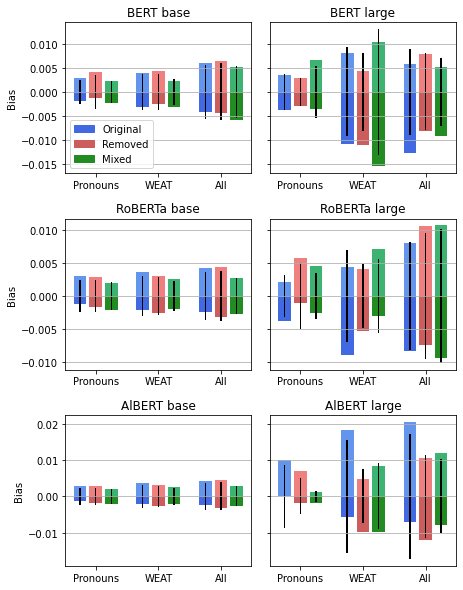

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(7, 10), sharey='row')
#fig.tight_layout()
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)
#left  = 0.125  # the left side of the subplots of the figure
#right = 0.9    # the right side of the subplots of the figure
#bottom = 0.1   # the bottom of the subplots of the figure
#top = 0.9      # the top of the subplots of the figure
#wspace = 0.2   # the amount of width reserved for blank space between subplots
#hspace = 0.2   # the amount of height reserved for white space between subplots

a = getVals('IMDB', 'bertbase')
b = getVals('IMDB', 'bertlarge')
c = getVals('IMDB', 'robertabase')
d = getVals('IMDB', 'robertabase')
e = getVals('IMDB', 'albertbase')
f = getVals('IMDB', 'albertlarge')

#x_pos = np.arange(len(a[0])) + [0,0,0,2,2,2,4,4,4]
x_pos = np.arange(len(a[0])) + [0,0,0,1,1,1,2,2,2]
c1 = ["cornflowerblue", "lightcoral", "mediumseagreen" ]*3
c2 = ["royalblue", "indianred", "forestgreen"]*3


axes[0,0].bar(x_pos, a[0], color = c1) 
axes[0,0].bar(x_pos, a[1], color = c2)
axes[0,0].bar(x_pos, a[4],  width=0.1, color = 'black')
axes[0,0].bar(x_pos, [-x for x in a[4]],  width=0.1, color = 'black')

axes[1,0].bar(x_pos, c[0], color = c1) 
axes[1,0].bar(x_pos, c[1], color = c2)
axes[1,0].bar(x_pos, c[4],  width=0.1, color = 'black')
axes[1,0].bar(x_pos, [-x for x in c[4]],  width=0.1, color = 'black')

axes[0,1].bar(x_pos, e[0], color = c1) 
axes[0,1].bar(x_pos, e[1], color = c2)
axes[0,1].bar(x_pos, e[4],  width=0.1, color = 'black')
axes[0,1].bar(x_pos, [-x for x in e[4]],  width=0.1, color = 'black')

axes[1,1].bar(x_pos, b[0], color = c1) 
axes[1,1].bar(x_pos, b[1], color = c2)
axes[1,1].bar(x_pos, b[4],  width=0.1, color = 'black')
axes[1,1].bar(x_pos, [-x for x in b[4]],  width=0.1, color = 'black')

axes[2,0].bar(x_pos, d[0], color = c1) 
axes[2,0].bar(x_pos, d[1], color = c2)
axes[2,0].bar(x_pos, d[4],  width=0.1, color = 'black')
axes[2,0].bar(x_pos, [-x for x in d[4]],  width=0.1, color = 'black')

axes[2,1].bar(x_pos, f[0], color = c1) 
axes[2,1].bar(x_pos, f[1], color = c2)
axes[2,1].bar(x_pos, f[4],  width=0.1, color = 'black')
axes[2,1].bar(x_pos, [-x for x in f[4]],  width=0.1, color = 'black')

axes[0,0].set_ylabel('Bias')
axes[1,0].set_ylabel('Bias')
axes[2,0].set_ylabel('Bias')

axes[0,0].title.set_text('BERT base')
axes[1,0].title.set_text('RoBERTa base')
axes[2,0].title.set_text('AlBERT base')

axes[0,1].title.set_text('BERT large')
axes[1,1].title.set_text('RoBERTa large')
axes[2,1].title.set_text('AlBERT large')

red_patch = mpatches.Patch(color="indianred", label='Removed')
blue_patch = mpatches.Patch(color="royalblue", label='Original')
green_patch = mpatches.Patch(color="forestgreen", label='Mixed')

axes[0,0].legend(handles=[blue_patch, red_patch, green_patch])
#axes[1,0].legend(handles=[blue_patch, red_patch, green_patch])
#axes[2,0].legend(handles=[blue_patch, red_patch, green_patch])

for i in [0,1]:
    for j in [0,1,2]:
        axes[j,i].yaxis.grid()
        axes[j,i].set_xticks(ticks=[x_pos[i] for i in [1,4,7]] , labels=["Pronouns", "WEAT", "All"])
        #axes[j,i].set_ylim([-0.022, 0.022])
       # axes[i,j].set_xticklabels()

plt.savefig("../res_plots/{}.pdf".format('boxpl_all'), bbox_inches='tight')


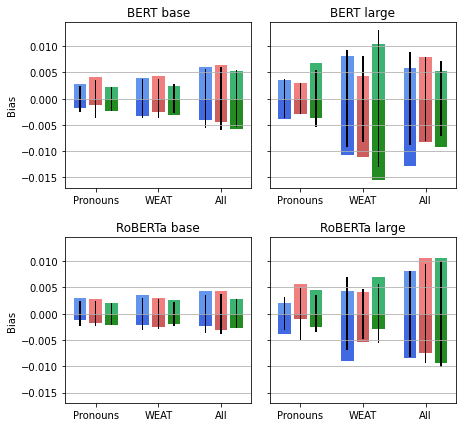

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(7,7), sharey=True)
#fig.tight_layout()
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)

a = getVals('IMDB', 'bertbase')
b = getVals('IMDB', 'bertlarge')
c = getVals('IMDB', 'robertabase')
d = getVals('IMDB', 'robertabase')

x_pos = np.arange(len(a[0])) + [0,0,0,1,1,1,2,2,2]
c1 = ["cornflowerblue", "lightcoral", "mediumseagreen" ]*3
c2 = ["royalblue", "indianred", "forestgreen"]*3

axes[0,0].bar(x_pos, a[0], color = c1) 
axes[0,0].bar(x_pos, a[1], color = c2)
axes[0,0].bar(x_pos, a[4],  width=0.1, color = 'black')
axes[0,0].bar(x_pos, [-x for x in a[4]],  width=0.1, color = 'black')

axes[1,0].bar(x_pos, c[0], color = c1) 
axes[1,0].bar(x_pos, c[1], color = c2)
axes[1,0].bar(x_pos, c[4],  width=0.1, color = 'black')
axes[1,0].bar(x_pos, [-x for x in c[4]],  width=0.1, color = 'black')

axes[0,1].bar(x_pos, e[0], color = c1) 
axes[0,1].bar(x_pos, e[1], color = c2)
axes[0,1].bar(x_pos, e[4],  width=0.1, color = 'black')
axes[0,1].bar(x_pos, [-x for x in e[4]],  width=0.1, color = 'black')

axes[1,1].bar(x_pos, b[0], color = c1) 
axes[1,1].bar(x_pos, b[1], color = c2)
axes[1,1].bar(x_pos, b[4],  width=0.1, color = 'black')
axes[1,1].bar(x_pos, [-x for x in b[4]],  width=0.1, color = 'black')

axes[0,0].set_ylabel('Bias')
axes[1,0].set_ylabel('Bias')

axes[0,0].title.set_text('BERT base')
axes[1,0].title.set_text('RoBERTa base')

axes[0,1].title.set_text('BERT large')
axes[1,1].title.set_text('RoBERTa large')

red_patch = mpatches.Patch(color="indianred", label='Removed')
blue_patch = mpatches.Patch(color="royalblue", label='Original')
green_patch = mpatches.Patch(color="forestgreen", label='Mixed')

#axes[0,0].legend(handles=[blue_patch, red_patch, green_patch])
#axes[1,0].legend(handles=[blue_patch, red_patch, green_patch])
#axes[2,0].legend(handles=[blue_patch, red_patch, green_patch])

for i in [0,1]:
    for j in [0,1]:
        axes[j,i].yaxis.grid()
        axes[j,i].set_xticks(ticks=[x_pos[i] for i in [1,4,7]] , labels=["Pronouns", "WEAT", "All"])
        #axes[j,i].set_ylim([-0.022, 0.022])
       # axes[i,j].set_xticklabels()

plt.savefig("../res_plots/{}.pdf".format('boxpl_bert_robert'), bbox_inches='tight')


[0.009890257242329246, 0.006892038308244815, 0.00111372873347269, 0.018355896470016383, 0.004648247082520507, 0.0083120011831567, 0.02055134982701042, 0.010436301612825199, 0.011789665685029161]
[-3.302414211848715e-05, -0.0018916024458851181, -0.001883797664487229, -0.005570605243916521, -0.00976202592530476, -0.009829695171488868, -0.0071046422084407755, -0.012026596395889573, -0.007908062606016612]
['Pronouns', 'remove Pronouns', 'mix Pronouns', 'WEAT', 'remove WEAT', 'mix WEAT', 'All', 'remove All', 'mix All']


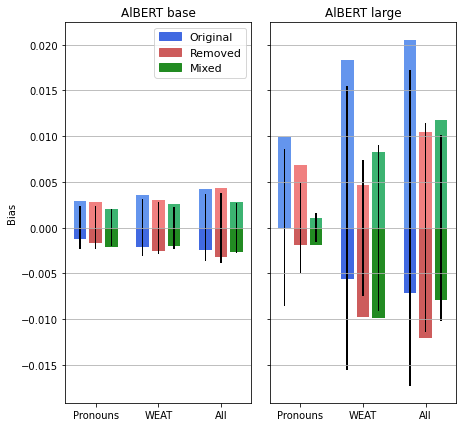

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(7,7), sharey='row')
#fig.tight_layout()
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)

e = getVals('IMDB', 'albertbase')
f = getVals('IMDB', 'albertlarge')

x_pos = np.arange(len(a[0])) + [0,0,0,1,1,1,2,2,2]
c1 = ["cornflowerblue", "lightcoral", "mediumseagreen" ]*3
c2 = ["royalblue", "indianred", "forestgreen"]*3

axes[0].bar(x_pos, d[0], color = c1) 
axes[0].bar(x_pos, d[1], color = c2)
print(f[0])
print(f[1])
print(f[2])
axes[0].bar(x_pos, d[4],  width=0.1, color = 'black')
axes[0].bar(x_pos, [-x for x in d[4]],  width=0.1, color = 'black')
axes[0].legend(handles=[blue_patch, red_patch, green_patch], prop={'size': 11})

#f[1][0] = f[1][0]*10

axes[1].bar(x_pos, f[0], color = c1) 
axes[1].bar(x_pos, f[1], color = c2)
axes[1].bar(x_pos, f[4],  width=0.1, color = 'black')
axes[1].bar(x_pos, [-x for x in f[4]],  width=0.1, color = 'black')

axes[0].title.set_text('AlBERT base')
axes[1].title.set_text('AlBERT large')
axes[0].set_ylabel('Bias')

for i in [0,1]:
    axes[i].grid(axis= "y")
    axes[i].set_xticks(ticks=[x_pos[i] for i in [1,4,7]] , labels=["Pronouns", "WEAT", "All"])
    
plt.savefig("../res_plots/{}.pdf".format('boxpl_albert'), bbox_inches='tight')


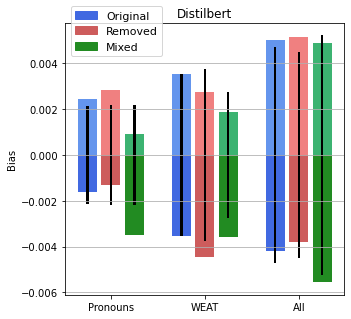

In [12]:
plt.rcParams["figure.figsize"] = (7,7)

dist = getVals('IMDB', 'distbase')

x_pos = np.arange(len(a[0])) + [0,0,0,1,1,1,2,2,2]
c1 = ["cornflowerblue", "lightcoral", "mediumseagreen" ]*3
c2 = ["royalblue", "indianred", "forestgreen"]*3

plt.bar(x_pos, dist[0], color = c1) 
plt.bar(x_pos, dist[1], color = c2)
plt.bar(x_pos, dist[4],  width=0.1, color = 'black')
plt.bar(x_pos, [-x for x in dist[4]],  width=0.1, color = 'black')
plt.legend(handles=[blue_patch, red_patch, green_patch], prop={'size': 11}, loc='center left', bbox_to_anchor=[0,0.97])

#plt.title.set_text('AlBERT base')
plt.title('Distilbert')
plt.ylabel('Bias')

plt.grid(axis= "y")
# plt.xticks(ticks=[x_pos[i] for i in [1,4,7]] , labels=["Pronouns", "WEAT", "All"])  

plt.xticks([x_pos[i] for i in [1,4,7]], ['Pronouns', "WEAT", "All"])
# plt.xticks(rotation=90)

plt.savefig("../res_plots/{}.pdf".format('boxpl_distil'), bbox_inches='tight')
